In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import sklearn as sklearn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("[Dataset] 0346747_Tang Wai Kin_prediction of used car price.csv")

# take a look at the dataset
df

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,4723,Renault Megane,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3681,4724,Audi A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3682,4725,BMW 3 Series,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3683,4726,Honda Accord,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


#Removing unwanted characted/label

In [ ]:
# Remove 'L' using regex

df['Engine'] = df['Engine'].str.replace('L', '', regex=True).astype(float)

df['Engine'].fillna(0, inplace=True)

In [ ]:

df.dropna(subset=['Emission Class'], inplace=True)
df['Emission Class'] = df['Emission Class'].str.replace('Euro', '', regex=True).astype(int)

# Data Statistics

In [ ]:
df.describe()

,Unnamed: 0,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,3598.000000,3598.000000,3.598000e+03,3598.000000,2244.000000,3598.000000,3598.000000,3592.000000,3598.000000
mean,2312.133685,5790.127571,8.152329e+04,2011.929405,2.807041,1.603335,4.316565,4.898385,4.909672
std,1418.058681,4512.331768,3.956193e+04,4.778382,1.543463,0.486453,0.988175,0.575638,0.910759
min,0.000000,400.000000,1.000000e+00,1992.000000,1.000000,0.000000,2.000000,2.000000,1.000000
25%,1053.250000,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,2273.500000,3999.500000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,3598.000000,7999.000000,1.032000e+05,2016.000000,4.000000,1.900000,5.000000,5.000000,6.000000
max,4727.000000,33900.000000,1.110100e+06,2023.000000,9.000000,6.300000,5.000000,7.000000,6.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3598 entries, 0 to 3684
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3598 non-null   int64  
 1   title              3598 non-null   object 
 2   Price              3598 non-null   int64  
 3   Mileage(miles)     3598 non-null   int64  
 4   Registration_Year  3598 non-null   int64  
 5   Previous Owners    2244 non-null   float64
 6   Fuel type          3598 non-null   object 
 7   Body type          3598 non-null   object 
 8   Engine             3598 non-null   float64
 9   Gearbox            3598 non-null   object 
 10  Doors              3598 non-null   float64
 11  Seats              3592 non-null   float64
 12  Emission Class     3598 non-null   int64  
 13  Service history    534 non-null    object 
dtypes: float64(4), int64(5), object(5)
memory usage: 421.6+ KB


# Missing Data Handling

In [ ]:
df.isnull()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3681,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3682,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3683,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0              0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1354
Fuel type               0
Body type               0
Engine                  0
Gearbox                 0
Doors                   0
Seats                   6
Emission Class          0
Service history      3064
dtype: int64


In [ ]:
df['Previous Owners'].fillna(df['Previous Owners'].mean(), inplace=True)

df['Doors'].fillna(df['Doors'].mean(), inplace=True)

df['Seats'].fillna(df['Seats'].mean(), inplace=True)

df['Service history'].fillna('no', inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0           0
title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
dtype: int64


# Basic Data Visualization

2495    127
2995    113
1995     71
3995     62
3495     55
       ... 
7970      1
2550      1
2445      1
4785      1
1745      1
Name: Price, Length: 861, dtype: int64


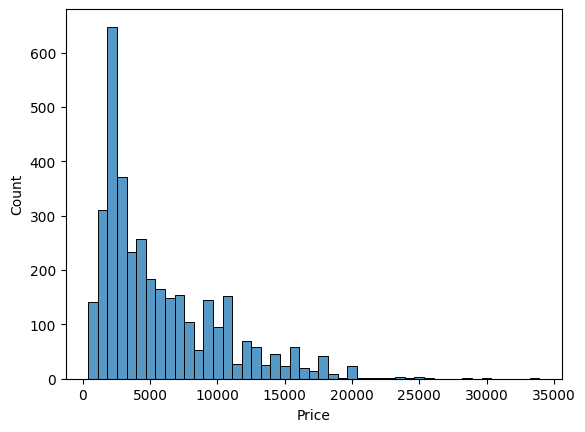

In [ ]:
sns.histplot(df["Price"])
print(df["Price"].value_counts())

80000     41
91000     37
93000     32
87000     31
67000     31
          ..
136782     1
67176      1
63960      1
69500      1
82160      1
Name: Mileage(miles), Length: 1542, dtype: int64


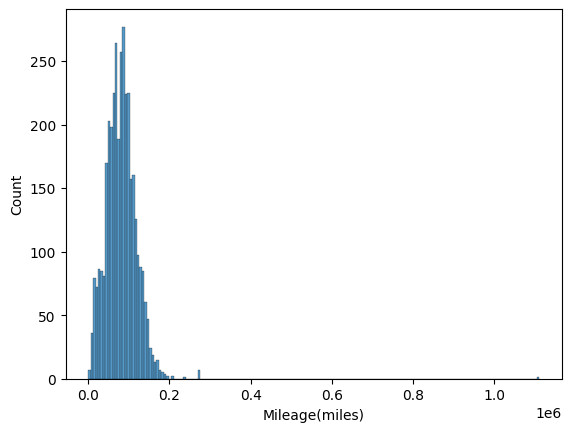

In [ ]:
sns.histplot(df["Mileage(miles)"])
print(df["Mileage(miles)"].value_counts())

2011    286
2010    269
2012    263
2014    257
2009    249
2016    244
2007    242
2013    240
2008    225
2019    211
2015    205
2017    162
2006    149
2020    105
2005    104
2018     95
2021     83
2004     72
2003     52
2002     30
2001     22
2022      8
1999      5
2023      5
2000      4
1998      3
1997      3
1995      2
1992      1
1996      1
1993      1
Name: Registration_Year, dtype: int64


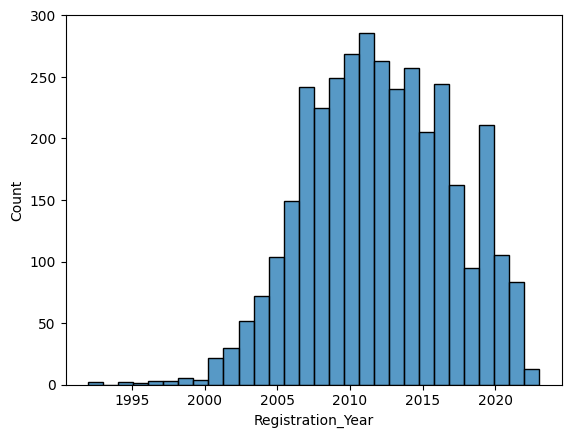

In [ ]:
sns.histplot(df["Registration_Year"])
print(df["Registration_Year"].value_counts())

2.807041    1354
2.000000     592
1.000000     512
3.000000     466
4.000000     355
5.000000     205
6.000000      60
7.000000      37
8.000000      12
9.000000       5
Name: Previous Owners, dtype: int64


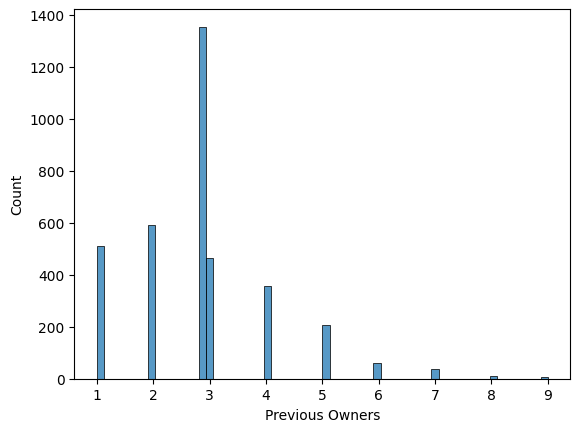

In [ ]:
sns.histplot(df["Previous Owners"])
print(df["Previous Owners"].value_counts())

1.6    730
2.0    545
1.2    516
1.4    421
1.0    324
1.5    290
1.3    166
1.8    153
3.0     77
2.2     75
2.1     62
1.1     39
1.7     34
1.9     31
2.5     31
2.4     27
0.9     15
3.5     10
2.7     10
3.2      7
4.4      5
3.7      5
4.2      4
5.0      3
2.8      3
2.3      3
0.8      2
2.6      2
4.3      2
3.1      1
3.3      1
5.5      1
4.8      1
0.0      1
6.3      1
Name: Engine, dtype: int64


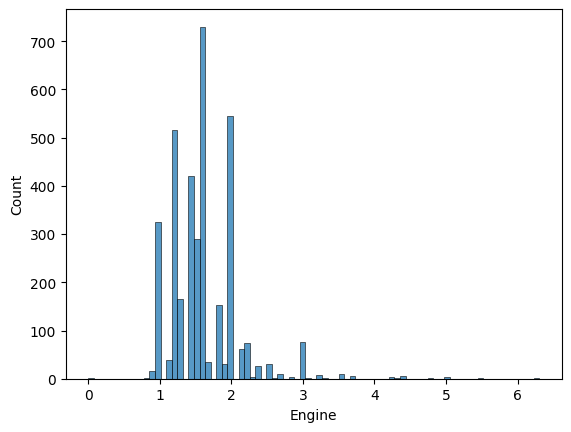

In [ ]:
sns.histplot(df["Engine"])
print(df["Engine"].value_counts())

5.0    2295
3.0     734
4.0     358
2.0     211
Name: Doors, dtype: int64


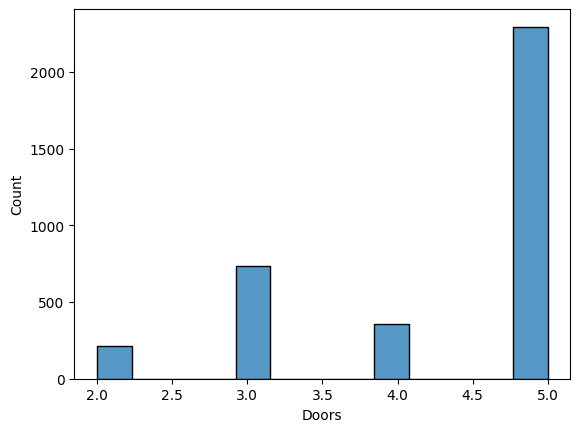

In [ ]:
sns.histplot(df["Doors"])
print(df["Doors"].value_counts())

5.000000    2917
4.000000     528
7.000000     118
2.000000      24
4.898385       6
6.000000       3
3.000000       2
Name: Seats, dtype: int64


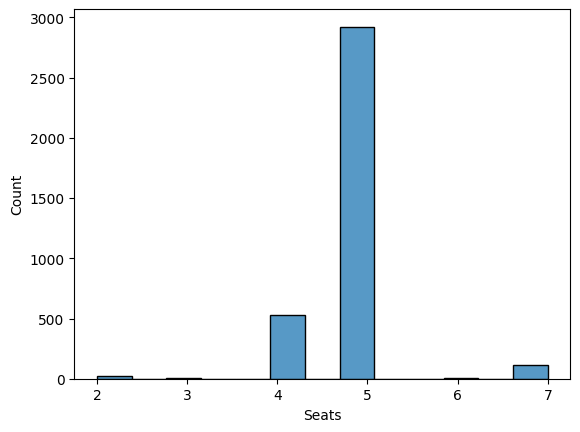

In [ ]:
sns.histplot(df["Seats"])
print(df["Seats"].value_counts())

5    1256
6    1108
4    1068
3     137
2      25
1       4
Name: Emission Class, dtype: int64


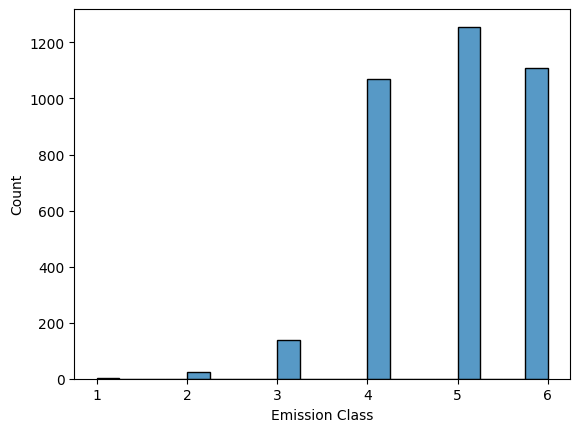

In [ ]:
sns.histplot(df["Emission Class"])
print(df["Emission Class"].value_counts())

Petrol                   2322
Diesel                   1207
Petrol Hybrid              41
Petrol Plug-in Hybrid      27
Diesel Hybrid               1
Name: Fuel type, dtype: int64


<Axes: xlabel='Fuel type', ylabel='Count'>

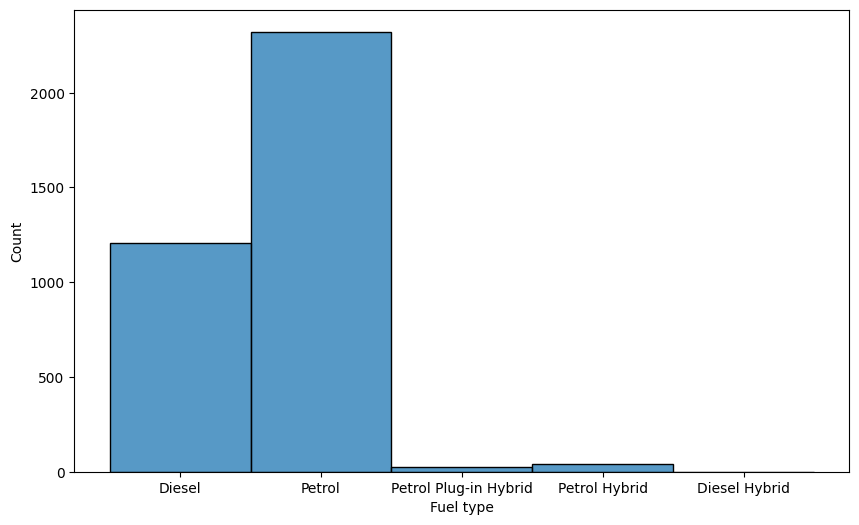

In [ ]:
print(df["Fuel type"].value_counts())
plt.figure(figsize=(10,6))
sns.histplot(df["Fuel type"])


# Variables Correlations

<ipython-input-90-00dd7f8da54c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


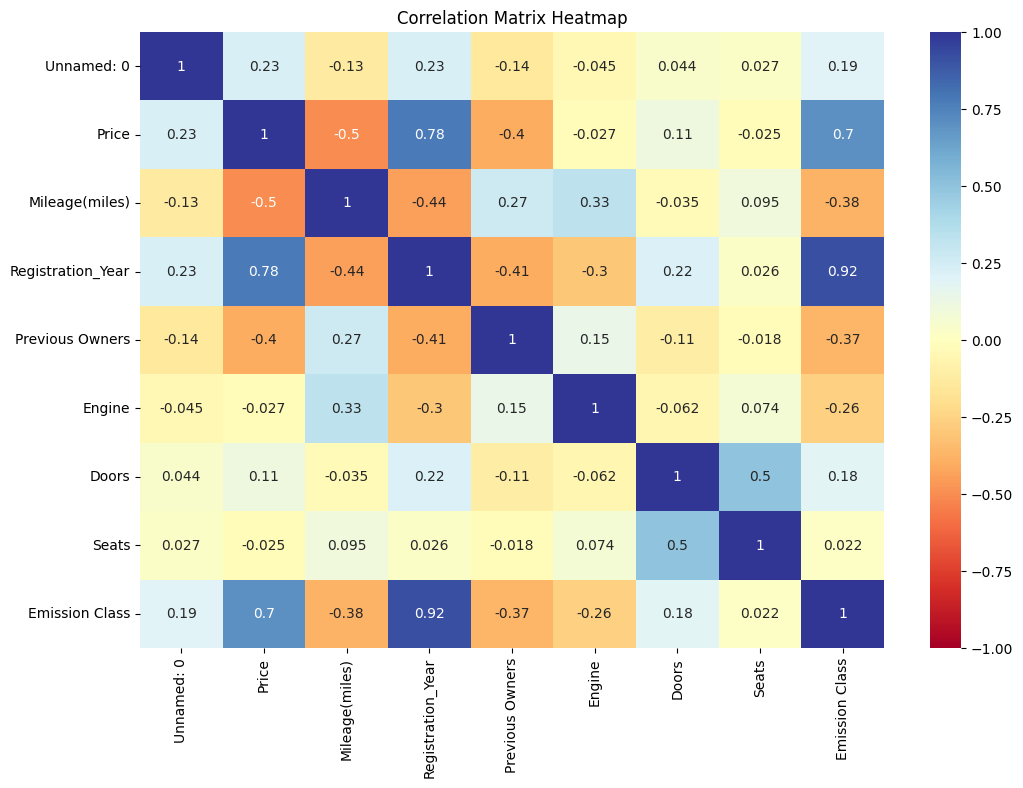

In [ ]:
correlation = df.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(correlation, annot=True, cmap='RdYlBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='Registration_Year', ylabel='Price'>

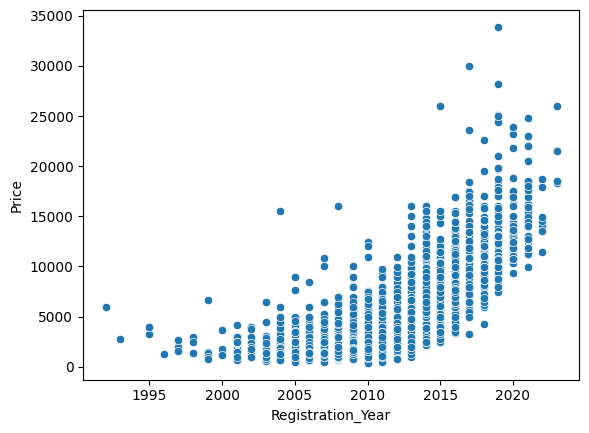

In [ ]:
sns.scatterplot(x=df["Registration_Year"],y=df["Price"])


<Axes: xlabel='Registration_Year', ylabel='Price'>

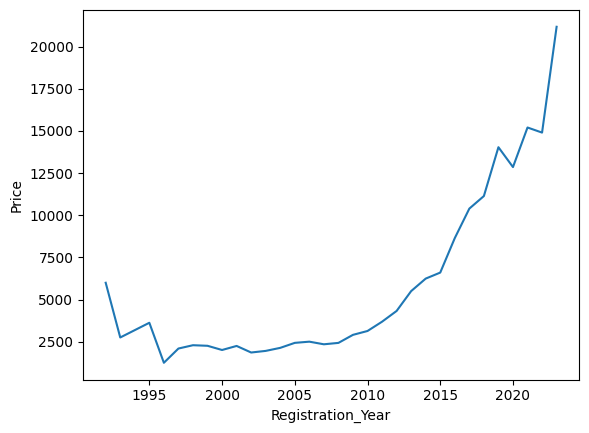

In [ ]:
tmp_df = df.groupby("Registration_Year").agg({"Price":"mean"})
sns.lineplot(x=tmp_df.index, y=tmp_df["Price"])

<Axes: xlabel='Previous Owners', ylabel='Price'>

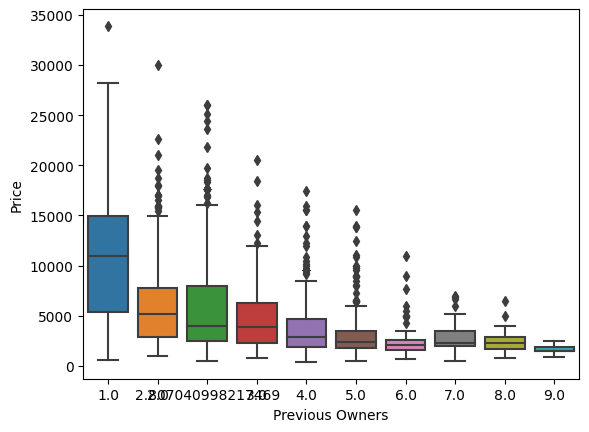

In [ ]:
sns.boxplot(x=df["Previous Owners"],y=df["Price"])


<Axes: xlabel='Previous Owners', ylabel='Price'>

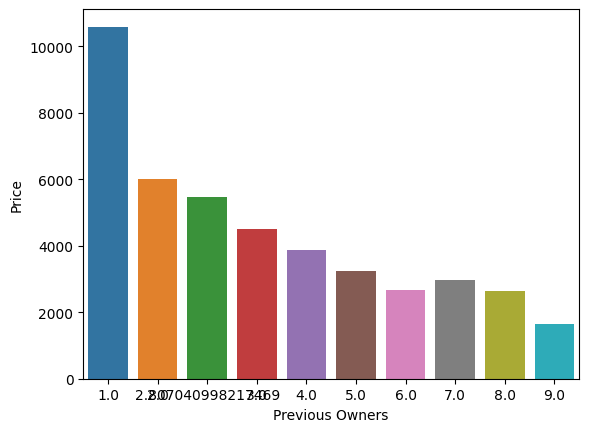

In [ ]:
tmp_df = df.groupby("Previous Owners").agg({"Price":"mean"})
sns.barplot(x=tmp_df.index,y=tmp_df["Price"])

<Axes: xlabel='Emission Class', ylabel='Price'>

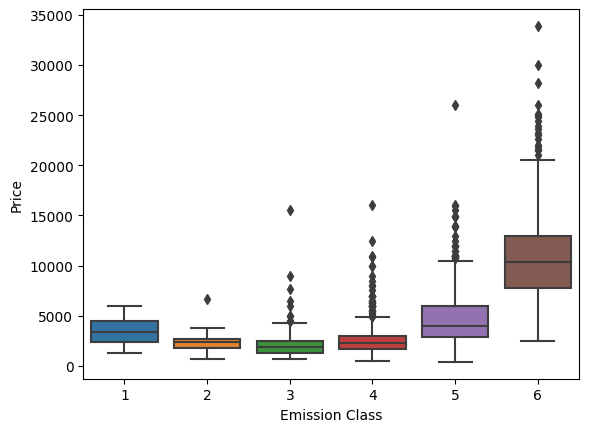

In [ ]:
 sns.boxplot(x=df["Emission Class"],y=df["Price"])


<Axes: xlabel='Emission Class', ylabel='Price'>

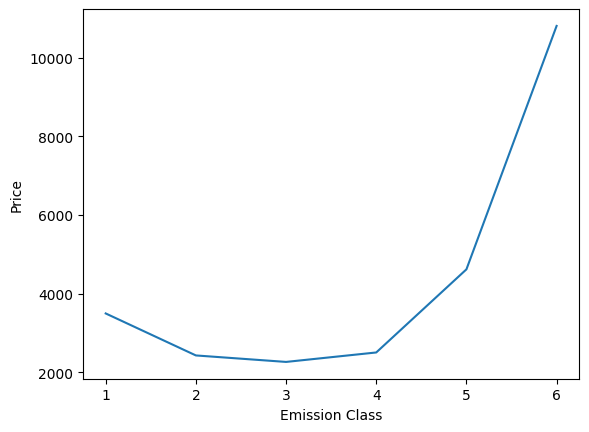

In [ ]:
tmp_df = df.groupby("Emission Class").agg({"Price":"mean"})
sns.lineplot(x=tmp_df.index, y=tmp_df["Price"])

<Axes: xlabel='Mileage(miles)', ylabel='Price'>

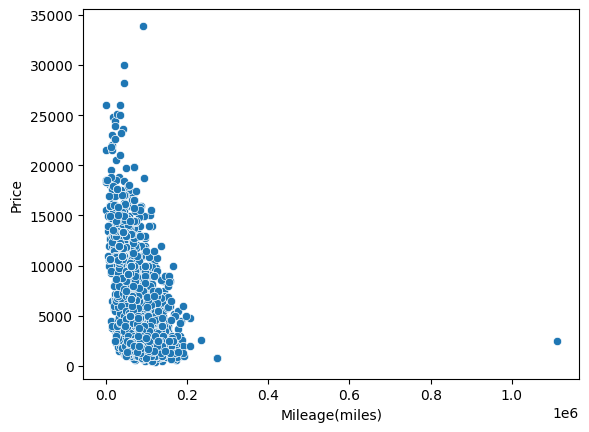

In [ ]:
sns.scatterplot(x=df["Mileage(miles)"],y=df["Price"])


<Axes: xlabel='Mileage(miles)', ylabel='Price'>

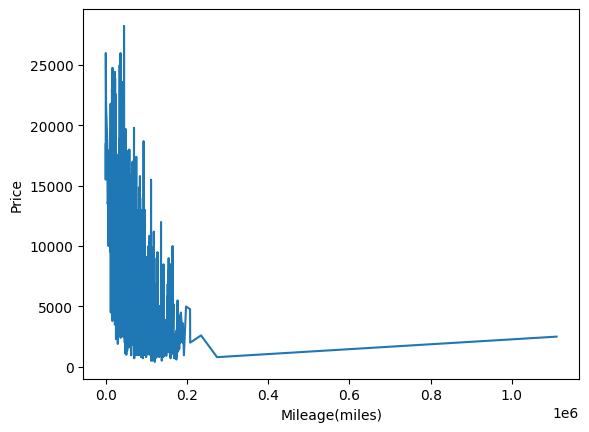

In [ ]:
tmp_df = df.groupby("Mileage(miles)").agg({"Price":"mean"})
sns.lineplot(x=tmp_df.index, y=tmp_df["Price"])

# Encoding categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [ ]:


df_label = df.copy()

#This step is optional but recommended to keep the original DataFrame intact while creating a new DataFrame for label encoding.
df_label['title'] = label_encoder.fit_transform(df['title'].fillna('Unknown'))
df_label['Fuel type'] = label_encoder.fit_transform(df['Fuel type'].fillna('Unknown'))
df_label['Body type'] = label_encoder.fit_transform(df['Body type'].fillna('Unknown'))
df_label['Gearbox'] = label_encoder.fit_transform(df['Gearbox'].fillna('Unknown'))
df_label['Service history'] = label_encoder.fit_transform(df['Service history'].fillna('Unknown'))

In [ ]:
df_label.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,339,6900,70189,2016,3.000000,0,4,1.4,1,5.0,5.0,6,1
1,1,388,1495,88585,2008,4.000000,2,4,1.2,1,3.0,5.0,4,0
2,2,159,949,137000,2011,2.807041,2,4,1.4,1,5.0,5.0,5,1
3,3,220,2395,96731,2010,5.000000,2,4,1.4,1,3.0,4.0,4,0
4,4,388,1000,85000,2013,2.807041,0,4,1.3,1,5.0,5.0,5,1


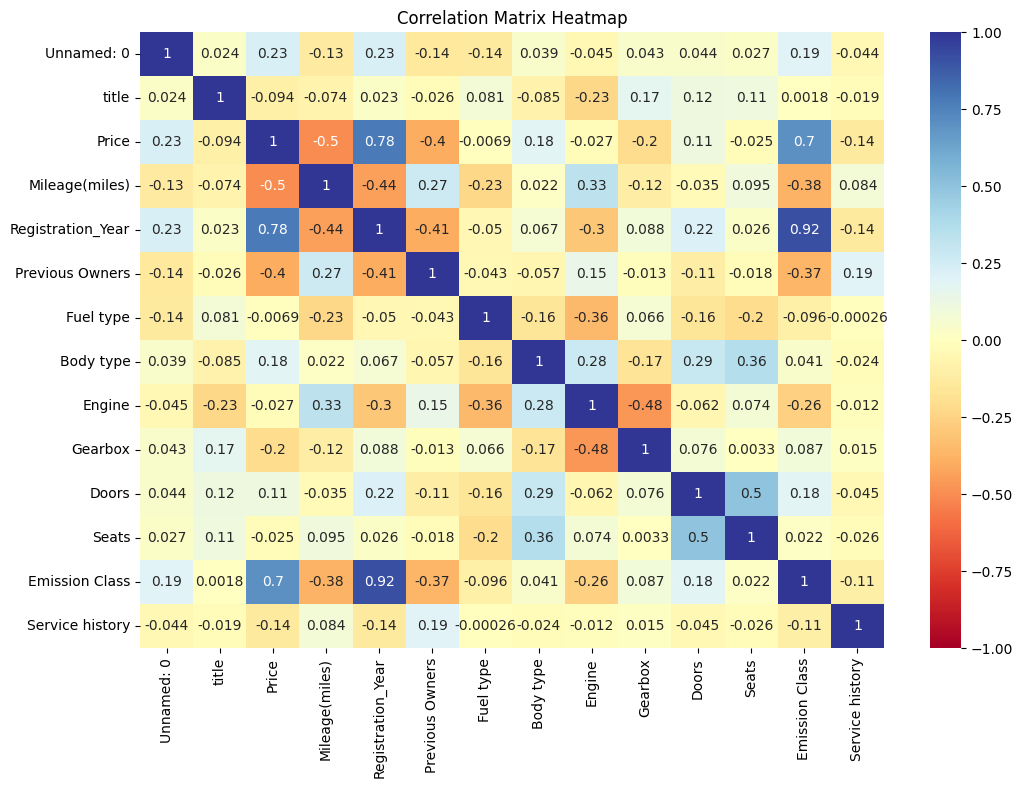

In [ ]:
correlation = df_label.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(correlation, annot=True, cmap='RdYlBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Linear Regression Model

# Experiment 1a



*   Without label encoding
*   Only numerical variables were experimented
*   Categorical variables were dropped






In [ ]:
df=df.drop(['Unnamed: 0','title','Fuel type','Service history','Gearbox','Body type'], axis=1)

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
LinearModel = LinearRegression()

In [ ]:
LinearModel.fit(X_train, y_train)


# Make predictions on the test set
y_pred = LinearModel.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 1792.37
Mean Squared Error (MSE): 6809460.37
Root Mean Squared Error (RMSE): 2609.49
R-squared (R2): 0.70


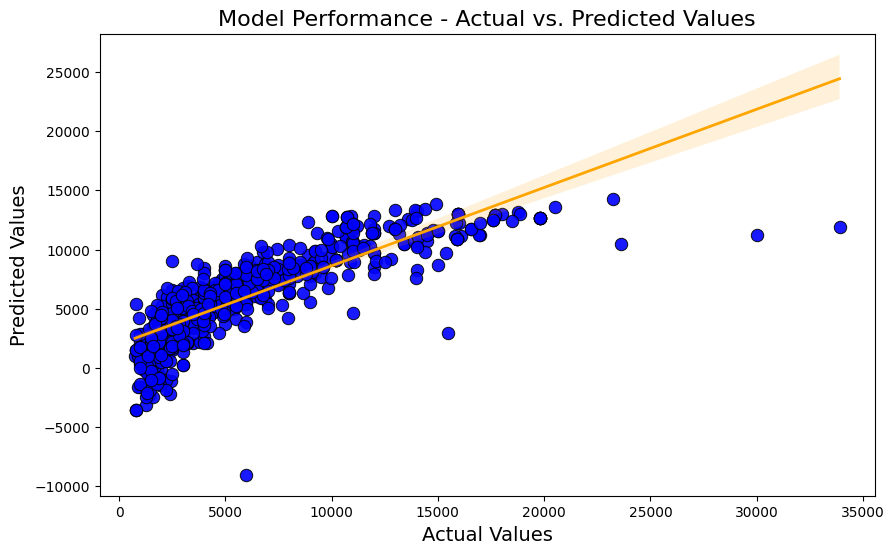

In [ ]:
plt.figure(figsize=(10, 6))

# Create a scatterplot
sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.9, edgecolor='k', s=80)

# Add a regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "orange", "lw": 2})


plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)


plt.show()

# Experiment 1b



*   Categorical variables are lebel encoded
*   Variables "ID" is dropped due to irrelavancy



In [ ]:
df_label=df_label.drop(['Unnamed: 0'], axis=1)

In [ ]:
X2 = df_label.drop('Price', axis=1)
y2 = df_label['Price']

In [ ]:
# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
LinearModel = LinearRegression()

In [ ]:
LinearModel.fit(X2_train, y2_train)


# Make predictions on the test set
y2_pred = LinearModel.predict(X2_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y2_test, y2_pred)
mse = mean_squared_error(y2_test, y2_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y2_test, y2_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 1635.76
Mean Squared Error (MSE): 5649380.85
Root Mean Squared Error (RMSE): 2376.84
R-squared (R2): 0.75


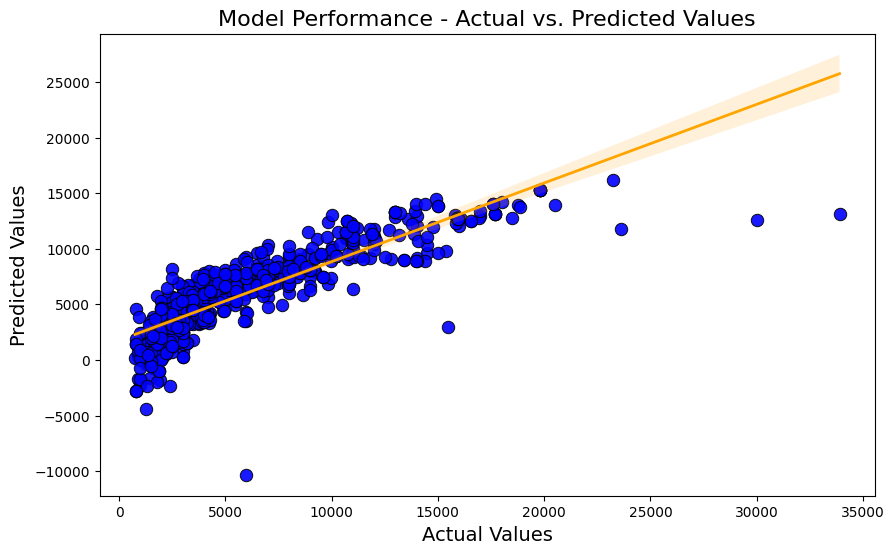

In [ ]:
plt.figure(figsize=(10, 6))

# Create a scatterplot
sns.scatterplot(x=y2_test, y=y2_pred, color='b', alpha=0.9, edgecolor='k', s=80)

# Add a regression line
sns.regplot(x=y2_test, y=y2_pred, scatter=False, color='r', line_kws={"color": "orange", "lw": 2})


plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)


plt.show()

# Polynomial Regression Model

# Experiment 2a

In [ ]:
pf = PolynomialFeatures(degree=3)

poly_df = Pipeline([
                    ("make_higher_degree", pf),
                    ("linear_regression", LinearRegression())])

poly_df = poly_df.fit(X2_train, y2_train)
poly_df.score(X2_train, y2_train)

0.878972120217162

In [ ]:

# Create a DataFrame to store feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': poly_df.named_steps["make_higher_degree"].get_feature_names_out(),
                        'Coefficient': poly_df.named_steps["linear_regression"].coef_})

# Display the coefficients
print(coef_df)


# Retrieving the coefficients
#print ('Coefficients: ', lr01.coef_)
print ('Intercept: ',poly_df.named_steps["linear_regression"].intercept_)

                              Feature  Coefficient
0                                   1     0.443992
1                               title    -0.137617
2                      Mileage(miles)     0.259150
3                   Registration_Year    -0.015603
4                     Previous Owners     0.000397
..                                ...          ...
450           Seats Service history^2     0.000024
451                  Emission Class^3     0.301048
452  Emission Class^2 Service history     0.097526
453  Emission Class Service history^2    -0.000947
454                 Service history^3     0.000041

[455 rows x 2 columns]
Intercept:  35809894.17105952


In [ ]:
poly_df.named_steps["make_higher_degree"].get_feature_names_out()

array(['1', 'title', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history', 'title^2',
       'title Mileage(miles)', 'title Registration_Year',
       'title Previous Owners', 'title Fuel type', 'title Body type',
       'title Engine', 'title Gearbox', 'title Doors', 'title Seats',
       'title Emission Class', 'title Service history',
       'Mileage(miles)^2', 'Mileage(miles) Registration_Year',
       'Mileage(miles) Previous Owners', 'Mileage(miles) Fuel type',
       'Mileage(miles) Body type', 'Mileage(miles) Engine',
       'Mileage(miles) Gearbox', 'Mileage(miles) Doors',
       'Mileage(miles) Seats', 'Mileage(miles) Emission Class',
       'Mileage(miles) Service history', 'Registration_Year^2',
       'Registration_Year Previous Owners', 'Registration_Year Fuel type',
       'Registration_Year Body type', 'Registration_Year Engine',
       'Registration_Y

In [ ]:
y_poly_pred = poly_df.predict(X2_test)

In [ ]:

mae = mean_absolute_error(y2_test,y_poly_pred)
mse = mean_squared_error(y2_test,y_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y2_test,y_poly_pred)

print("Mean absolute error: %.2f" %mae)
print("Residual sum of squares (MSE): %.2f" %mse)
print("Residual sum of squares (MSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 1313.98
Residual sum of squares (MSE): 4513792.78
Residual sum of squares (MSE): 2124.57
R2-score: 0.80


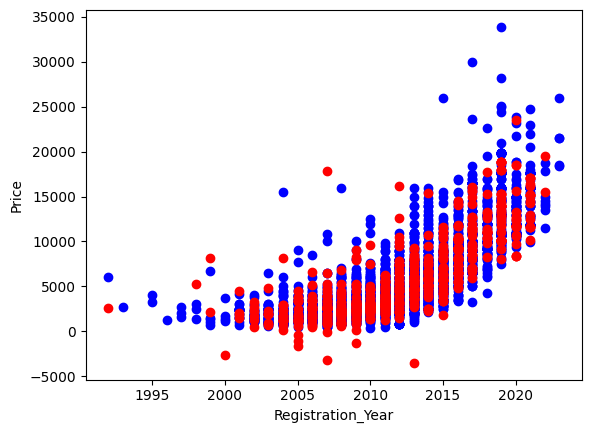

In [ ]:
plt.scatter(X['Registration_Year'], y, color='blue')
plt.scatter(X2_test['Registration_Year'], y_poly_pred, color='red')
plt.xlabel("Registration_Year")
plt.ylabel("Price")
plt.show()

# Experiment 2b

Fine tuning polynomial regression model

In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10,100,1000,10000],  # Test different values of alpha

}

ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X2_train, y2_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error')

In [ ]:
best_alpha = grid_search.best_params_['alpha']

best_estimator = grid_search.best_estimator_


In [ ]:
y2_poly_pred = best_estimator.predict(X2_test)
mae = mean_absolute_error(y2_test,y2_poly_pred)
mse = mean_squared_error(y2_test, y2_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y2_test, y2_poly_pred)


print("Mean absolute error: %.2f" %mae)
print("Mean Squared Error:", mse)
print("Residual sum of squares (MSE): %.2f" %rmse)
print("R-squared:", r2)


Mean absolute error: 1635.22
Mean Squared Error: 5654956.72375469
Residual sum of squares (MSE): 2378.02
R-squared: 0.7492951616202406


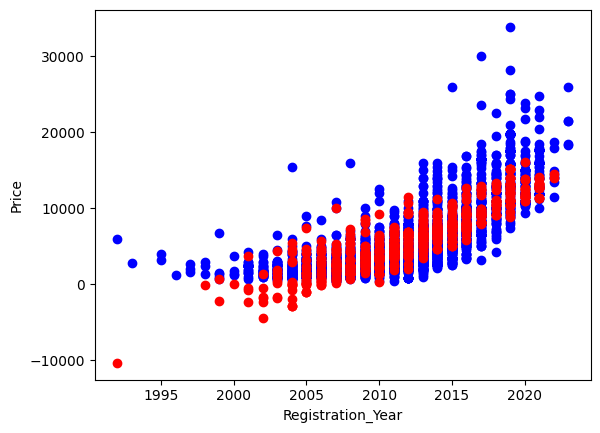

In [ ]:
plt.scatter(X['Registration_Year'], y, color='blue')
plt.scatter(X2_test['Registration_Year'], y2_poly_pred, color='red')
plt.xlabel("Registration_Year")
plt.ylabel("Price")
plt.show()

# Decision Tree Model

# Experiment 3a

In [ ]:
# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
np.unique(y2_train, return_counts=True)

(array([  400,   450,   495,   499,   500,   595,   640,   695,   699,
          700,   750,   790,   795,   798,   799,   800,   850,   889,
          890,   895,   899,   925,   949,   950,   975,   988,   990,
          993,   995,   999,  1000,  1075,  1100,  1145,  1148,  1150,
         1175,  1189,  1190,  1195,  1200,  1250,  1270,  1289,  1290,
         1295,  1299,  1300,  1325,  1349,  1350,  1370,  1389,  1390,
         1395,  1399,  1400,  1425,  1449,  1450,  1475,  1487,  1489,
         1490,  1495,  1498,  1499,  1500,  1548,  1550,  1575,  1585,
         1595,  1599,  1600,  1645,  1650,  1675,  1680,  1695,  1699,
         1700,  1745,  1749,  1750,  1785,  1789,  1790,  1795,  1799,
         1800,  1839,  1850,  1875,  1880,  1889,  1890,  1895,  1899,
         1900,  1949,  1950,  1970,  1975,  1985,  1989,  1990,  1993,
         1994,  1995,  1998,  1999,  2000,  2050,  2094,  2100,  2145,
         2150,  2175,  2190,  2195,  2199,  2200,  2245,  2249,  2250,
      

In [ ]:
np.unique(y2_test, return_counts=True)

(array([  750,   795,   798,   800,   875,   895,   945,   990,   994,
          999,  1000,  1095,  1195,  1200,  1290,  1295,  1299,  1300,
         1348,  1399,  1400,  1449,  1450,  1480,  1489,  1490,  1495,
         1499,  1500,  1575,  1595,  1599,  1600,  1650,  1689,  1690,
         1695,  1699,  1750,  1795,  1799,  1800,  1850,  1889,  1895,
         1900,  1949,  1950,  1975,  1989,  1990,  1994,  1995,  1999,
         2000,  2075,  2090,  2095,  2100,  2110,  2150,  2195,  2199,
         2200,  2240,  2249,  2250,  2295,  2299,  2350,  2390,  2395,
         2445,  2449,  2450,  2477,  2489,  2490,  2495,  2497,  2499,
         2500,  2595,  2600,  2667,  2685,  2690,  2695,  2699,  2700,
         2745,  2749,  2750,  2789,  2799,  2800,  2870,  2879,  2889,
         2895,  2920,  2950,  2985,  2989,  2990,  2995,  2999,  3000,
         3100,  3195,  3230,  3250,  3289,  3295,  3350,  3399,  3450,
         3470,  3490,  3495,  3500,  3550,  3599,  3652,  3690,  3695,
      

In [ ]:
DT = DecisionTreeRegressor(random_state=42)
DT_01 = DT.fit(X2_train, y2_train)

In [ ]:

test_preds = DT_01.predict (X2_test)

In [ ]:
mae = mean_absolute_error(y2_test,test_preds)
mse = mean_squared_error(y2_test, test_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y2_test, test_preds)

print("Mean absolute error: %.2f" %mae)
print("Mean Squared Error:", mse)
print("Residual sum of squares (MSE): %.2f" %rmse)
print("R-squared:", r2)

Mean absolute error: 1193.20
Mean Squared Error: 4886234.715347222
Residual sum of squares (MSE): 2210.48
R-squared: 0.7833754094967967


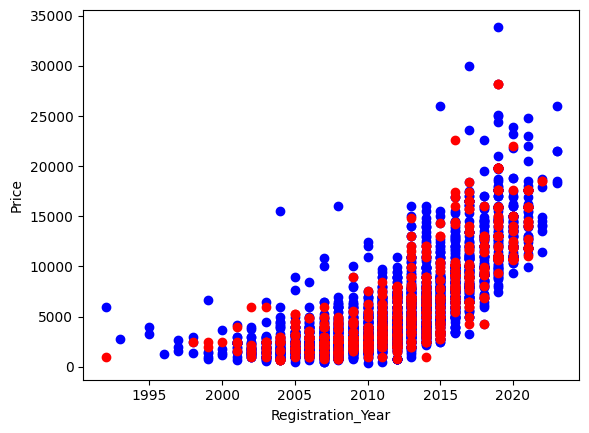

In [ ]:
plt.scatter(X['Registration_Year'], y, color='blue')
plt.scatter(X2_test['Registration_Year'], test_preds, color='red')
plt.xlabel("Registration_Year")
plt.ylabel("Price")
plt.show()

# Experiment 3b

Fine tuning decision tree model

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Test different values for the maximum depth
    'min_samples_split': [2, 5, 10],  # Test different values for the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Test different values for the minimum samples required at a leaf node
}

In [ ]:
DT = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator = DT,
    param_grid = param_grid,
    scoring ='neg_mean_squared_error' ,
    cv = 5)

grid_search.fit(X2_train, y2_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [ ]:
y2_dt_pred = best_estimator.predict(X2_test)
mae = mean_absolute_error(y2_test,y2_dt_pred)
mse = mean_squared_error(y2_test, y2_dt_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y2_test, y2_dt_pred)

print("Mean absolute error: %.2f" %mae)
print("Mean Squared Error:", mse)
print("Residual sum of squares (MSE): %.2f" %rmse)
print("R-squared:", r2)

Mean absolute error: 1100.46
Mean Squared Error: 3811611.1449417346
Residual sum of squares (MSE): 1952.33
R-squared: 0.831017388330316


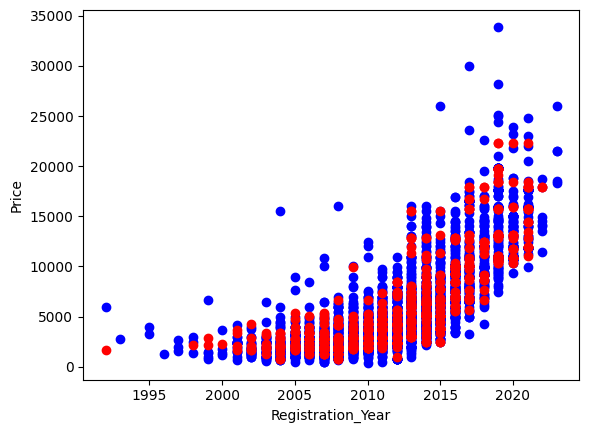

In [ ]:
plt.scatter(X['Registration_Year'], y, color='blue')
plt.scatter(X2_test['Registration_Year'], y2_dt_pred, color='red')
plt.xlabel("Registration_Year")
plt.ylabel("Price")
plt.show()